# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


In [9]:
df_test.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,0,1,2,2,8,0,0,0,0,NaN
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,0,2,1,15,0,0,0,0,NaN
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,0,1,1,1,1,0,0,0,0,NaN
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,0,1,3,2,9,0,0,0,0,NaN
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,0,1,1,1,5,0,0,0,0,NaN


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15223 entries, 0 to 15222
Data columns (total 52 columns):
AGREEMENT_RK                  15223 non-null int64
TARGET                        15223 non-null int64
AGE                           15223 non-null int64
SOCSTATUS_WORK_FL             15223 non-null int64
SOCSTATUS_PENS_FL             15223 non-null int64
GENDER                        15223 non-null int64
CHILD_TOTAL                   15223 non-null int64
DEPENDANTS                    15223 non-null int64
EDUCATION                     15223 non-null object
MARITAL_STATUS                15223 non-null object
GEN_INDUSTRY                  13856 non-null object
GEN_TITLE                     13856 non-null object
ORG_TP_STATE                  13856 non-null object
ORG_TP_FCAPITAL               13858 non-null object
JOB_DIR                       13856 non-null object
FAMILY_INCOME                 15223 non-null object
PERSONAL_INCOME               15223 non-null object
REG_ADDRESS_PRO

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 0 to 14909
Data columns (total 52 columns):
AGREEMENT_RK                  14910 non-null int64
TARGET                        14910 non-null int64
AGE                           14910 non-null int64
SOCSTATUS_WORK_FL             14910 non-null int64
SOCSTATUS_PENS_FL             14910 non-null int64
GENDER                        14910 non-null int64
CHILD_TOTAL                   14910 non-null int64
DEPENDANTS                    14910 non-null int64
EDUCATION                     14910 non-null object
MARITAL_STATUS                14910 non-null object
GEN_INDUSTRY                  13564 non-null object
GEN_TITLE                     13564 non-null object
ORG_TP_STATE                  13564 non-null object
ORG_TP_FCAPITAL               13567 non-null object
JOB_DIR                       13564 non-null object
FAMILY_INCOME                 14910 non-null object
PERSONAL_INCOME               14910 non-null object
REG_ADDRESS_PRO

## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [11]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,1,1,1,6,2,1,1580,1580,NaN,train
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,1,1,1,6,1,1,4020,4020,NaN,train
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,1,2,1,11,0,0,0,0,NaN,train
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,6,3,1,"1589,92333333333",1590,NaN,train
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,1,2,1,16,2,1,"1152,15",2230,NaN,train


In [14]:
df_test.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test


In [12]:
df_train.shape

(15223, 53)

In [13]:
df_test.shape

(14910, 53)

In [14]:
df = df_test.append(df_train).reset_index(drop=True)

In [15]:
df.shape

(30133, 53)

In [16]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test


### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [18]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Среднее специальное', 'Неоконченное высшее', 'Высшее', 'Среднее', 'Ученая степень', 'Два и более высших образования', 'Неполное среднее'}


MARITAL_STATUS
{'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак', 'Не состоял в браке', 'Разведен(а)'}


GEN_INDUSTRY
{nan, 'Коммунальное хоз-во/Дорожные службы', 'Информационные технологии', 'Юридические услуги/нотариальные услуги', 'Маркетинг', 'Транспорт', 'Торговля', 'Нефтегазовая промышленность', 'Сборочные производства', 'Туризм', 'Металлургия/Промышленность/Машиностроение', 'Ресторанный бизнес/Общественное питание', 'Образование', 'Строительство', 'Управляющая компания', 'Наука', 'Информационные услуги', 'Страхование', 'Развлечения/Искусство', 'Государственная служба', 'ЧОП/Детективная д-ть', 'Энергетика', 'Логистика', 'СМИ/Реклама/PR-агенства', 'Здравоохранение', 'Подбор персонала', 'Банк/Финансы', 'Салоны красоты и здоровья', 'Другие сферы', 'Сельское хозяйство', 'Химия/Парфюмерия/Фармацевтика', 'Недвижимость'}


GEN_TITLE


In [22]:
# Столбцы объединенной таблицы "df" и значения в этих столбцах
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Ученая степень', 'Высшее', 'Два и более высших образования', 'Неполное среднее', 'Среднее', 'Среднее специальное', 'Неоконченное высшее'}


MARITAL_STATUS
{'Разведен(а)', 'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова', 'Гражданский брак'}


GEN_INDUSTRY
{nan, 'Химия/Парфюмерия/Фармацевтика', 'Юридические услуги/нотариальные услуги', 'Металлургия/Промышленность/Машиностроение', 'Ресторанный бизнес/Общественное питание', 'Энергетика', 'Здравоохранение', 'Транспорт', 'Государственная служба', 'Управляющая компания', 'СМИ/Реклама/PR-агенства', 'Сельское хозяйство', 'Банк/Финансы', 'Информационные технологии', 'Коммунальное хоз-во/Дорожные службы', 'Салоны красоты и здоровья', 'ЧОП/Детективная д-ть', 'Информационные услуги', 'Торговля', 'Страхование', 'Образование', 'Подбор персонала', 'Другие сферы', 'Развлечения/Искусство', 'Сборочные производства', 'Наука', 'Строительство', 'Недвижимость', 'Туризм', 'Маркетинг', 'Логистика', 'Нефтегазовая промышленность'}


GEN_TITLE


Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [554]:
#df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float32')

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [516]:
# Пропуски есть в полях 
# GEN_INDUSTRY                  
# GEN_TITLE                     
# ORG_TP_STATE                  
# ORG_TP_FCAPITAL              
# JOB_DIR                     
# TP_PROVINCE                  
# REGION_NM                 
# WORK_TIME                     
# PREVIOUS_CARD_NUM_UTILIZED    

In [ ]:
#==============================================================================
# Проанализируем пропуски в поле GEN_INDUSTRY-отрасль работы клиента

In [20]:
df.GEN_INDUSTRY.values

array(['Образование', nan, 'Металлургия/Промышленность/Машиностроение',
       ..., 'Торговля', nan, 'Транспорт'], dtype=object)

In [249]:
#print(list(df[df['GEN_INDUSTRY'].isnull()]['SOCSTATUS_WORK_FL']))

In [35]:
#print(list(df[~df['GEN_INDUSTRY'].isnull()]['SOCSTATUS_WORK_FL']))

In [21]:
# Число нулей в предыдущей выборке (работающие без сведений об отрасли работы):
print(len(list(df[~df['GEN_INDUSTRY'].isnull() & (df['SOCSTATUS_WORK_FL'] == 0)]['SOCSTATUS_WORK_FL'])))

26


In [28]:
# Вывод: для всех безработных в поле GEN_INDUSTRY - пропуск; а ПОЧТИ для всех работающих в поле GEN_INDUSTRY казано значение
# Предлагаемые корректировки: а) для всех безработных в поле GEN_INDUSTRY заполнить "Нет_работы"; 
# б) записи для работающих, но с пропуском в GEN_INDUSTRY - удалить (в силу малого каличества эти записи портят статистику
#... можно очистить)

In [ ]:
#==============================================================================
# Аналогично GEN_INDUSTRY проанализируем пропуски 
# в полях GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR и WORK_TIME

In [37]:
#print(list(df[
#    df['GEN_INDUSTRY'].isnull() | (df['GEN_TITLE'].isnull()) | (df['ORG_TP_STATE'].isnull()) \
#
#    | (df['ORG_TP_FCAPITAL'].isnull()) | (df['JOB_DIR'].isnull())  | (df['WORK_TIME'].isnull())
#][
#    'SOCSTATUS_WORK_FL'
#]))

In [22]:
# Размер предыдущей выборки (работающие без сведений об отрасли работы):
print(len(list(df[
    ~(df['GEN_INDUSTRY'].isnull() | (df['GEN_TITLE'].isnull()) | (df['ORG_TP_STATE'].isnull()) \
      | (df['ORG_TP_FCAPITAL'].isnull()) | (df['JOB_DIR'].isnull()) | (df['WORK_TIME'].isnull()))        
][
    'SOCSTATUS_WORK_FL'
])))

# Число нулей в предыдущей выборке (работающие без сведений об отрасли работы):
print(len(list(df[
    (~(df['GEN_INDUSTRY'].isnull() | (df['GEN_TITLE'].isnull()) | (df['ORG_TP_STATE'].isnull()) \
      | (df['ORG_TP_FCAPITAL'].isnull()) | (df['JOB_DIR'].isnull()) | (df['WORK_TIME'].isnull()))) \
    &  (df['SOCSTATUS_WORK_FL'] == 0)       
][
    'SOCSTATUS_WORK_FL'
])))

27416
22


In [252]:
# Вывод: для всех безработных (SOCSTATUS_WORK_FL = 0) 
# в полях GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, JOB_DIR и WORK_TIME - встречаются пропуски; 
# а ПОЧТИ для всех работающих во всех этих полях указаны значения 
# (исключения составляют только примерно 22 записи о работающих с пропусками в сведениях о работе - т.е. меньше 0.1% !)
# Предлагаемые корректировки: а) для всех безработных в полях GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, OORG_TP_FCAPITAL 
# и JOB_DIR заполнить "Нет_работы"; 
# б) для всех безработных в вещественном поле WORK_TIME заполнить пропуски значением 0
# в) записи для работающих, но с пропусками в этих полях - удалить (в силу малого каличества эти записи портят статистику
#... можно очистить)

In [ ]:
#==============================================================================
# Проанализируем пропуски в поле TP_PROVINCE-область торговой точки, где клиент брал последний кредит

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

In [24]:
#==============================================================================
# Записей с пропусками в поле TP_PROVINCE- 
print (
    df.shape[0] - df.loc[
    ~df['TP_PROVINCE'].isnull(),
    'TP_PROVINCE'
].count()
)
print((df.shape[0] - df.loc[
    ~df['TP_PROVINCE'].isnull(),
    'TP_PROVINCE'
].count()) * 100 / df.shape[0], ' процентов'
)

590
1.9579862609099659  процентов


In [113]:
# Вывод: количество записей с пропусками в поле 'TP_PROVINCE' - менее 2 %
# Предлагаемые корректировки: а) записи с пропусками в поле 'TP_PROVINCE' - можно удалить (в силу малого каличества эти записи портят статистику)

In [141]:
#==============================================================================
# Проанализируем пропуски в поле REGION_NM - регион РФ

In [25]:
# Записей с пропусками в поле REGION_NM - 
print (
    df.shape[0] - df.loc[
    ~df['REGION_NM'].isnull(),
    'REGION_NM'
].count()
)
print((df.shape[0] - df.loc[
    ~df['REGION_NM'].isnull(),
    'REGION_NM'
].count()) * 100 / df.shape[0], ' процентов'
)

2
0.006637241562406664  процентов


In [26]:
df.loc[
    df['REG_ADDRESS_PROVINCE'] == 'Новосибирская область',
    ['REGION_NM', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE']
    
].head()

,REGION_NM,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE
71,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
222,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
240,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
241,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область
356,ЗАПАДНО-СИБИРСКИЙ,Новосибирская область,Новосибирская область,Новосибирская область


In [27]:
df.loc[
    df['REGION_NM'].isnull(),
    ['REGION_NM', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE']
    
]

,REGION_NM,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE
3099,NaN,Новосибирская область,Новосибирская область,Новосибирская область
17420,NaN,Новосибирская область,Новосибирская область,Новосибирская область


In [473]:
# Вывод: количество записей с пропусками в поле 'REGION_NM' - менее 0.007 %
# Но видно что для таких записей можно заполнить: REGION_NM='ЗАПАДНО-СИБИРСКИЙ'
# Предлагаемые корректировки: в записях с пропусками в поле 'REGION_NM' заполнить их значением 'ЗАПАДНО-СИБИРСКИЙ'

In [380]:
#==============================================================================
# Проанализируем пропуски в поле PREVIOUS_CARD_NUM_UTILIZED - количество уже утилизированных карт ( если пусто - 0)

In [28]:
df.PREVIOUS_CARD_NUM_UTILIZED.value_counts()

1.0    595
2.0      5
Name: PREVIOUS_CARD_NUM_UTILIZED, dtype: int64

In [ ]:
# Вывод: в самом определении поля PREVIOUS_CARD_NUM_UTILIZED указано, что пустое значение означает 0 карт !
# Предлагаемые корректировки: в записях с пропусками в поле 'PREVIOUS_CARD_NUM_UTILIZED' заполнить их значением 0

In [ ]:
# =========================================================
# ОБЪЕДИНЯЕМ ВСЕ ВЫВОДЫ:
# -----------------------------1
# Для всех безработных (SOCSTATUS_WORK_FL = 0) в полях GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, ORG_TP_FCAPITAL, 
# JOB_DIR и WORK_TIME - встречаются пропуски; а ПОЧТИ для всех работающих во всех этих полях указаны значения 
# (исключения составляют только примерно 22 записи о работающих с пропусками в сведениях о работе - т.е. меньше 0.1% !)
# Предлагаемые корректировки: а) для всех безработных в полях GEN_INDUSTRY, GEN_TITLE, ORG_TP_STATE, OORG_TP_FCAPITAL, 
# JOB_DIR заполнить "Нет_работы"; 
# б) для всех безработных в вещественном поле WORK_TIME заполнить пропуски значением 0
# в) записи для работающих, но с пропусками в этих полях - удалить (в силу малого каличества эти записи портят статистику
#... можно очистить)

# -----------------------------2
#Количество записей с пропусками в поле 'TP_PROVINCE' - менее 2 %
# Предлагаемые корректировки: а) записи с пропусками в поле 'TP_PROVINCE' - можно удалить 
# (в силу малого каличества эти записи портят статистику)

# -----------------------------3
#Количество записей с пропусками в поле 'REGION_NM' - менее 0.007 %
# Но видно что для таких записей можно заполнить: REGION_NM='ЗАПАДНО-СИБИРСКИЙ'
# Предлагаемые корректировки: в записях с пропусками в поле 'REGION_NM' заполнить их значением 'ЗАПАДНО-СИБИРСКИЙ'

# -----------------------------4
# В самом определении поля PREVIOUS_CARD_NUM_UTILIZED указано, что пустое значение означает 0 карт !
# Предлагаемые корректировки: в записях с пропусками в поле 'PREVIOUS_CARD_NUM_UTILIZED' заполнить их значением 0

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
#===================================================
# Категориальные признаки есть. 
# Это - 'EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', 'ORG_TP_FCAPITAL', 'JOB_DIR', 
# 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', 'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM' 
# и 'FAMILY_INCOME'

In [29]:
df[['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', \
   'ORG_TP_FCAPITAL', 'JOB_DIR', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', \
   'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'FAMILY_INCOME']]

,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,FAMILY_INCOME
0,Среднее специальное,Не состоял в браке,Образование,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Красноярский край,Красноярский край,Красноярский край,Красноярский край,ВОСТОЧНО-СИБИРСКИЙ,от 10000 до 20000 руб.
1,Среднее,Состою в браке,NaN,NaN,NaN,NaN,NaN,Орловская область,Орловская область,Орловская область,Орловская область,ЦЕНТРАЛЬНЫЙ 1,от 10000 до 20000 руб.
2,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,Специалист,Частная компания,Без участия,Участие в основ. деятельности,Коми,Коми,Коми,Коми,ЦЕНТРАЛЬНЫЙ 2,от 20000 до 50000 руб.
3,Среднее,Не состоял в браке,Другие сферы,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Читинская область,Читинская область,Читинская область,Читинская область,ВОСТОЧНО-СИБИРСКИЙ,от 20000 до 50000 руб.
4,Высшее,Состою в браке,Образование,Специалист,Государственная комп./учреж.,Без участия,Вспомогательный техперсонал,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,ДАЛЬНЕВОСТОЧНЫЙ,от 20000 до 50000 руб.
5,Среднее специальное,Состою в браке,NaN,NaN,NaN,NaN,NaN,Кировская область,Кировская область,Кировская область,Кировская область,ПРИВОЛЖСКИЙ,от 10000 до 20000 руб.
6,Среднее,Не состоял в браке,Сборочные производства,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Курганская область,Курганская область,Курганская область,Курганская область,УРАЛЬСКИЙ,от 10000 до 20000 руб.
7,Среднее специальное,Разведен(а),Образование,Специалист,Государственная комп./учреж.,Без участия,Участие в основ. деятельности,Томская область,Томская область,Томская область,Томская область,ЗАПАДНО-СИБИРСКИЙ,от 10000 до 20000 руб.
8,Среднее специальное,Состою в браке,NaN,NaN,NaN,NaN,NaN,Омская область,Омская область,Омская область,Омская область,ЗАПАДНО-СИБИРСКИЙ,от 10000 до 20000 руб.
9,Неполное среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,Без участия,Вспомогательный техперсонал,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,от 5000 до 10000 руб.


In [30]:
df.GEN_INDUSTRY.values

array(['Образование', nan, 'Металлургия/Промышленность/Машиностроение',
       ..., 'Торговля', nan, 'Транспорт'], dtype=object)

In [32]:
print(set(df['GEN_INDUSTRY']))

{nan, 'Коммунальное хоз-во/Дорожные службы', 'Информационные технологии', 'Юридические услуги/нотариальные услуги', 'Маркетинг', 'Транспорт', 'Торговля', 'Нефтегазовая промышленность', 'Сборочные производства', 'Туризм', 'Металлургия/Промышленность/Машиностроение', 'Ресторанный бизнес/Общественное питание', 'Образование', 'Строительство', 'Управляющая компания', 'Наука', 'Информационные услуги', 'Страхование', 'Развлечения/Искусство', 'Государственная служба', 'ЧОП/Детективная д-ть', 'Энергетика', 'Логистика', 'СМИ/Реклама/PR-агенства', 'Здравоохранение', 'Подбор персонала', 'Банк/Финансы', 'Салоны красоты и здоровья', 'Другие сферы', 'Сельское хозяйство', 'Химия/Парфюмерия/Фармацевтика', 'Недвижимость'}


In [33]:
print(set(df['ORG_TP_FCAPITAL']))

{'Без участия', nan, 'С участием'}


In [35]:
df['ORG_TP_FCAPITAL'] = pd.factorize(df['ORG_TP_FCAPITAL'])[0]

In [36]:
df[['EDUCATION', 'MARITAL_STATUS', 'GEN_INDUSTRY', 'GEN_TITLE', 'ORG_TP_STATE', \
   'ORG_TP_FCAPITAL', 'JOB_DIR', 'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', \
   'POSTAL_ADDRESS_PROVINCE', 'TP_PROVINCE', 'REGION_NM', 'FAMILY_INCOME']]

,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,GEN_TITLE,ORG_TP_STATE,ORG_TP_FCAPITAL,JOB_DIR,REG_ADDRESS_PROVINCE,FACT_ADDRESS_PROVINCE,POSTAL_ADDRESS_PROVINCE,TP_PROVINCE,REGION_NM,FAMILY_INCOME
0,Среднее специальное,Не состоял в браке,Образование,Специалист,Государственная комп./учреж.,0,Участие в основ. деятельности,Красноярский край,Красноярский край,Красноярский край,Красноярский край,ВОСТОЧНО-СИБИРСКИЙ,от 10000 до 20000 руб.
1,Среднее,Состою в браке,NaN,NaN,NaN,-1,NaN,Орловская область,Орловская область,Орловская область,Орловская область,ЦЕНТРАЛЬНЫЙ 1,от 10000 до 20000 руб.
2,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,Специалист,Частная компания,0,Участие в основ. деятельности,Коми,Коми,Коми,Коми,ЦЕНТРАЛЬНЫЙ 2,от 20000 до 50000 руб.
3,Среднее,Не состоял в браке,Другие сферы,Специалист,Государственная комп./учреж.,0,Участие в основ. деятельности,Читинская область,Читинская область,Читинская область,Читинская область,ВОСТОЧНО-СИБИРСКИЙ,от 20000 до 50000 руб.
4,Высшее,Состою в браке,Образование,Специалист,Государственная комп./учреж.,0,Вспомогательный техперсонал,Хабаровский край,Хабаровский край,Хабаровский край,Хабаровский край,ДАЛЬНЕВОСТОЧНЫЙ,от 20000 до 50000 руб.
5,Среднее специальное,Состою в браке,NaN,NaN,NaN,-1,NaN,Кировская область,Кировская область,Кировская область,Кировская область,ПРИВОЛЖСКИЙ,от 10000 до 20000 руб.
6,Среднее,Не состоял в браке,Сборочные производства,Специалист,Государственная комп./учреж.,0,Участие в основ. деятельности,Курганская область,Курганская область,Курганская область,Курганская область,УРАЛЬСКИЙ,от 10000 до 20000 руб.
7,Среднее специальное,Разведен(а),Образование,Специалист,Государственная комп./учреж.,0,Участие в основ. деятельности,Томская область,Томская область,Томская область,Томская область,ЗАПАДНО-СИБИРСКИЙ,от 10000 до 20000 руб.
8,Среднее специальное,Состою в браке,NaN,NaN,NaN,-1,NaN,Омская область,Омская область,Омская область,Омская область,ЗАПАДНО-СИБИРСКИЙ,от 10000 до 20000 руб.
9,Неполное среднее,Состою в браке,Торговля,Рабочий,Индивидуальный предприниматель,0,Вспомогательный техперсонал,Оренбургская область,Оренбургская область,Оренбургская область,Оренбургская область,ПОВОЛЖСКИЙ,от 5000 до 10000 руб.


In [43]:
print(set(df['ORG_TP_FCAPITAL']))

{0, 1, -1}


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               30133 non-null int64
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROV

In [40]:
#df['WORK_TIME'] = df['WORK_TIME'].apply(pd.t)

In [45]:
#Избавление от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, 
# LOAN_MAX_DLQ_AMT, WORK_TIME и PREVIOUS_CARD_NUM_UTILIZED
    # Заменяем в этих полях запятые на точки и пробуем преобразовать к вещественному типу
df['PERSONAL_INCOME'] = df['PERSONAL_INCOME'].map(lambda x: x.replace(',' , '.')).astype('float32')
df['CREDIT'] = df['CREDIT'].map(lambda x: x.replace(',' , '.')).astype('float32')
df['FST_PAYMENT'] = df['FST_PAYMENT'].map(lambda x: x.replace(',' , '.')).astype('float32')
df['LOAN_AVG_DLQ_AMT'] = df['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',' , '.')).astype('float32')
df['LOAN_MAX_DLQ_AMT'] = df['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',' , '.')).astype('float32')
#df['WORK_TIME'] = df['WORK_TIME'].map(lambda x: x.replace(',' , '.')).astype('float32')
#df['PREVIOUS_CARD_NUM_UTILIZED'] = df['PREVIOUS_CARD_NUM_UTILIZED'].map(lambda x: x.replace(',' , '.')).astype('float32')

In [46]:
df['WORK_TIME'] = df['WORK_TIME'].map(lambda x: x).astype('float32')
df['PREVIOUS_CARD_NUM_UTILIZED'] = df['PREVIOUS_CARD_NUM_UTILIZED'].map(lambda x: x).astype('float32')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               30133 non-null int64
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float32
REG_ADDRESS_PRO

In [48]:
df['EDUCATION'] = pd.factorize(df['EDUCATION'])[0]
df['MARITAL_STATUS'] = pd.factorize(df['MARITAL_STATUS'])[0]
df['GEN_INDUSTRY'] = pd.factorize(df['GEN_INDUSTRY'])[0]
df['GEN_TITLE'] = pd.factorize(df['GEN_TITLE'])[0]
df['ORG_TP_STATE'] = pd.factorize(df['ORG_TP_STATE'])[0]
df['JOB_DIR'] = pd.factorize(df['JOB_DIR'])[0]
df['REG_ADDRESS_PROVINCE'] = pd.factorize(df['REG_ADDRESS_PROVINCE'])[0]
df['FACT_ADDRESS_PROVINCE'] = pd.factorize(df['FACT_ADDRESS_PROVINCE'])[0]
df['POSTAL_ADDRESS_PROVINCE'] = pd.factorize(df['POSTAL_ADDRESS_PROVINCE'])[0]
df['TP_PROVINCE'] = pd.factorize(df['TP_PROVINCE'])[0]
df['REGION_NM'] = pd.factorize(df['REGION_NM'])[0]
df['FAMILY_INCOME'] = pd.factorize(df['FAMILY_INCOME'])[0]

In [49]:
df.head(30)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,0,0,...,1,2,2,8,0,0,0.000000,0.000000,NaN,test
1,59910420,0,48,0,1,1,0,0,1,1,...,0,2,1,15,0,0,0.000000,0.000000,NaN,test
2,59911223,0,35,1,0,0,1,0,1,0,...,1,1,1,1,0,0,0.000000,0.000000,NaN,test
3,59911322,0,22,1,0,0,0,0,1,0,...,1,3,2,9,0,0,0.000000,0.000000,NaN,test
4,59911438,0,27,1,0,1,2,2,2,1,...,1,1,1,5,0,0,0.000000,0.000000,NaN,test
5,59911769,0,44,0,1,0,2,2,0,1,...,0,1,1,5,0,0,0.000000,0.000000,NaN,test
6,59912044,0,57,1,0,1,0,0,1,0,...,1,3,3,14,0,0,0.000000,0.000000,NaN,test
7,59912382,0,33,1,0,1,2,2,0,2,...,1,1,1,5,0,0,0.000000,0.000000,NaN,test
8,59912422,0,53,0,1,1,2,0,0,1,...,0,1,1,4,0,0,0.000000,0.000000,NaN,test
9,59912485,1,33,1,0,0,1,0,3,1,...,1,1,1,6,0,0,0.000000,0.000000,NaN,test


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null int64
MARITAL_STATUS                30133 non-null int64
GEN_INDUSTRY                  30133 non-null int64
GEN_TITLE                     30133 non-null int64
ORG_TP_STATE                  30133 non-null int64
ORG_TP_FCAPITAL               30133 non-null int64
JOB_DIR                       30133 non-null int64
FAMILY_INCOME                 30133 non-null int64
PERSONAL_INCOME               30133 non-null float32
REG_ADDRESS_PROVINCE  

In [51]:
df.loc[
    (df['SOCSTATUS_WORK_FL'] == 0) #& (df['WORK_TIME'] == 0)
    ,
    ['SOCSTATUS_WORK_FL', 'WORK_TIME']    
    
]

,SOCSTATUS_WORK_FL,WORK_TIME
1,0,NaN
5,0,NaN
8,0,NaN
12,0,NaN
20,0,NaN
28,0,NaN
30,0,NaN
57,0,NaN
77,0,NaN
96,0,NaN


In [52]:
df.loc[
    (df['SOCSTATUS_WORK_FL'] == 0)
    ,
    'WORK_TIME'  
] = 0

In [53]:
df.loc[
    (df['SOCSTATUS_WORK_FL'] == 0)
    ,
    ['SOCSTATUS_WORK_FL', 'WORK_TIME'] 
]

,SOCSTATUS_WORK_FL,WORK_TIME
1,0,0.0
5,0,0.0
8,0,0.0
12,0,0.0
20,0,0.0
28,0,0.0
30,0,0.0
57,0,0.0
77,0,0.0
96,0,0.0


In [54]:
print(set(df['WORK_TIME']))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 140.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 150.0, 151.0, 152.0, 153.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, nan

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null int64
MARITAL_STATUS                30133 non-null int64
GEN_INDUSTRY                  30133 non-null int64
GEN_TITLE                     30133 non-null int64
ORG_TP_STATE                  30133 non-null int64
ORG_TP_FCAPITAL               30133 non-null int64
JOB_DIR                       30133 non-null int64
FAMILY_INCOME                 30133 non-null int64
PERSONAL_INCOME               30133 non-null float32
REG_ADDRESS_PROVINCE  

In [56]:
df.loc[
    (df['WORK_TIME'].isnull())
    ,
    :  
]

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
22873,64469089,0,24,1,0,0,0,0,0,0,...,0,1,0,5,1,1,540.0,540.0,NaN,train


In [57]:
df.drop(df.index[[22873]], inplace=True)

In [59]:
df.loc[
    (df['WORK_TIME'].isnull())
    ,
    :  
]

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample


In [60]:
df.loc[
    df['PREVIOUS_CARD_NUM_UTILIZED'].isnull(), 
    'PREVIOUS_CARD_NUM_UTILIZED'
] = 0

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30132 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30132 non-null int64
TARGET                        30132 non-null int64
AGE                           30132 non-null int64
SOCSTATUS_WORK_FL             30132 non-null int64
SOCSTATUS_PENS_FL             30132 non-null int64
GENDER                        30132 non-null int64
CHILD_TOTAL                   30132 non-null int64
DEPENDANTS                    30132 non-null int64
EDUCATION                     30132 non-null int64
MARITAL_STATUS                30132 non-null int64
GEN_INDUSTRY                  30132 non-null int64
GEN_TITLE                     30132 non-null int64
ORG_TP_STATE                  30132 non-null int64
ORG_TP_FCAPITAL               30132 non-null int64
JOB_DIR                       30132 non-null int64
FAMILY_INCOME                 30132 non-null int64
PERSONAL_INCOME               30132 non-null float32
REG_ADDRESS_PROVINCE  

In [62]:
#Удалим незначимые признаки !!!!!!!!!!!!!!!!!!!!!!!!!!
cols = ['ORG_TP_FCAPITAL','REG_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','REGION_NM','REG_FACT_FL','FACT_POST_FL','REG_POST_FL','REG_FACT_POST_FL','REG_FACT_POST_TP_FL','OWN_AUTO','DL_DOCUMENT_FL','GPF_DOCUMENT_FL','FACT_LIVING_TERM','WORK_TIME','FACT_PHONE_FL',
'REG_PHONE_FL','GEN_PHONE_FL']
df = df.drop(cols, axis=1)


In [63]:
df.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,FST_PAYMENT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,0,0,...,335.200012,2,2,8,0,0,0.0,0.0,0.0,test
1,59910420,0,48,0,1,1,0,0,1,1,...,2000.000000,2,1,15,0,0,0.0,0.0,0.0,test
2,59911223,0,35,1,0,0,1,0,1,0,...,2490.000000,1,1,1,0,0,0.0,0.0,0.0,test
3,59911322,0,22,1,0,0,0,0,1,0,...,575.000000,3,2,9,0,0,0.0,0.0,0.0,test
4,59911438,0,27,1,0,1,2,2,2,1,...,10000.000000,1,1,5,0,0,0.0,0.0,0.0,test


In [64]:
#df_preproc = df.pipe(preproc_data)

df_train_preproc = df.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df.query('sample == "test"').drop(['sample'], axis=1)

In [636]:
#Задание 4. Отделите целевую переменную и остальные признаки
#Должно получится:

#2 матрицы: X и X_test
#2 вектора: y и y_test

In [65]:
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

In [66]:
X = X.reset_index(drop='True')

In [67]:
y = y.reset_index(drop='True')

In [68]:
X.head()

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,TERM,FST_PAYMENT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,49,1,0,1,2,1,0,1,4,...,6,8650.0,1,1,6,2,1,1580.000000,1580.0,0.0
1,59910230,32,1,0,1,3,3,1,1,4,...,6,4000.0,1,1,6,1,1,4020.000000,4020.0,0.0
2,59910525,52,1,0,1,4,0,3,1,17,...,12,4000.0,2,1,11,0,0,0.000000,0.0,0.0
3,59910803,39,1,0,1,1,1,2,1,0,...,6,5000.0,1,1,6,3,1,1589.923340,1590.0,0.0
4,59911781,30,1,0,0,0,0,1,1,10,...,12,4000.0,2,1,16,2,1,1152.150024,2230.0,0.0


In [69]:
y.head(15)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    1
12    1
13    0
14    0
Name: TARGET, dtype: int64

In [70]:
X_test.head()

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,TERM,FST_PAYMENT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59909969,30,1,0,1,1,1,0,0,0,...,5,335.200012,2,2,8,0,0,0.0,0.0,0.0
1,59910420,48,0,1,1,0,0,1,1,-1,...,6,2000.000000,2,1,15,0,0,0.0,0.0,0.0
2,59911223,35,1,0,0,1,0,1,0,1,...,6,2490.000000,1,1,1,0,0,0.0,0.0,0.0
3,59911322,22,1,0,0,0,0,1,0,2,...,4,575.000000,3,2,9,0,0,0.0,0.0,0.0
4,59911438,27,1,0,1,2,2,2,1,0,...,6,10000.000000,1,1,5,0,0,0.0,0.0,0.0


In [66]:
#Задание 5. Обучение и оценка качества разных моделей

In [72]:
from sklearn.cross_validation import train_test_split
# test_size=0.3, random_state=42
## Your Code Here

In [ ]:
#Имеем:
#X = df_train_preproc.drop(['TARGET'], axis=1)
#X_test = df_test_preproc.drop(['TARGET'], axis=1)
#y = df_train_preproc['TARGET']
#y_test = df_test_preproc['TARGET']

In [73]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

## Your Code Here

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [646]:
# На занятиях делали так: X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)
# В данном задании тренировочная (otp_train.csv) и тестовая (otp_test.csv) выборки уже заданы
# Поэтому кросс-валидация не имеет здесь смысла и просто указываем X_train, X_test, y_train, y_test вручную !
#X_train = X 
#X_test = X_test
#y_train = y
#y_test = y_test

# !!!!!!!!!

In [75]:
print('X_train - ', X_train.shape)
print('X_test - ', X_test.shape)
print('y_train - ', y_train.shape)
print('y_test - ', y_test.shape)

X_train -  (10198, 34)
X_test -  (5024, 34)
y_train -  (10198,)
y_test -  (5024,)


In [76]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Your Code Here

In [310]:
#X_train.drop('PERSONAL_INCOME', axis=1, inplace=True)

In [313]:
#X_test.drop('PERSONAL_INCOME', axis=1, inplace=True)

In [620]:
#X_train[['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'WORK_TIME', \
#              'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', \
#              'PREVIOUS_CARD_NUM_UTILIZED']] = \
#X_train[['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'WORK_TIME', \
#              'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', \
#              'PREVIOUS_CARD_NUM_UTILIZED']].apply(pd.to_float32)
#
#df[['col2','col3']] = df[['col2','col3']].apply(pd.to_numeric)

In [621]:
#df_output['PERSONAL_INCOME'] = df_output['PERSONAL_INCOME'].map(lambda x: x.replace(',' , '.')).astype('float64')

#X_train(['PERSONAL_INCOME']) = X_train(['PERSONAL_INCOME']).astype('float32')
#X_train(['CREDIT']) = X_train(['CREDIT']).astype('float32')
#X_train(['FST_PAYMENT']) = X_train(['FST_PAYMENT']).astype('float32')
#X_train(['PERSONAL_INCOME']) = X_train(['PERSONAL_INCOME']).astype('float32')
#X_train(['WORK_TIME']) = X_train(['WORK_TIME']).astype('float32')
#X_train(['LOAN_AVG_DLQ_AMT']) = X_train(['LOAN_AVG_DLQ_AMT']).astype('float32')
#X_train(['LOAN_MAX_DLQ_AMT']) = X_train(['LOAN_MAX_DLQ_AMT']).astype('float32')
#X_train(['PREVIOUS_CARD_NUM_UTILIZED']) = X_train(['PREVIOUS_CARD_NUM_UTILIZED']).astype('float32')

#'PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'WORK_TIME', \
#              'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', \
#    'PREVIOUS_CARD_NUM_UTILIZED'

In [622]:
#X_train(['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'WORK_TIME', \
#              'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', \
#              'PREVIOUS_CARD_NUM_UTILIZED']).astype('float32')

In [ ]:
#Имеем:
#X = df_train_preproc.drop(['TARGET'], axis=1)
#X_test = df_test_preproc.drop(['TARGET'], axis=1)
#y = df_train_preproc['TARGET']
#y_test = df_test_preproc['TARGET']

In [77]:
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

In [78]:
from sklearn.cross_validation import train_test_split

In [79]:
X.shape

(15222, 34)

In [80]:
y.shape

(15222,)

In [81]:
k0 = 0
k1 = 0
all = 0
for value in y:
    if value == 0:
        k0 +=1
    elif value == 1:
        k1 +=1
    all += 1
print ('нулей: ', k0)
print ('единиц: ', k1, '(', k1*100/all, '% )')
print ('всего: ', all)

нулей:  13410
единиц:  1812 ( 11.903823413480488 % )
всего:  15222


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)

In [83]:
X_test = df_test_preproc.drop(['TARGET'], axis=1)
y_test = df_test_preproc['TARGET']

In [84]:
# 1. Модель с алгоритммом "Дерево решений" - DecisionTreeClassifier
#------------------------------------------------------------------
from sklearn.tree import DecisionTreeClassifier
#dtc = DecisionTreeClassifier(max_depth=30, random_state=17)
dtc = DecisionTreeClassifier()
#dtc.fit(X_train, y_train)
#predictDTC = dtc.predict(X_test)

In [85]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [86]:
dtc_params = {'max_depth': range(2, 10), 'max_features': range(3,15), 'criterion': ['entropy', 'gini']}

In [87]:
dtc_grid = GridSearchCV(dtc, dtc_params, cv=5, n_jobs=-1, verbose=True)

In [88]:
dtc_grid.fit(X_train, y_train)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   19.3s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:   29.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 10), 'max_features': range(3, 15), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [ ]:
# При: 
# dtc_params = {'max_depth': range(2,12), 'max_features': range(4,15), 'random_state': range(1,100), 
#'criterion': ['entropy', 'gini']}
# получили:
# dtc_grid.best_params_
# {'criterion': 'entropy', 'max_depth': 4, 'max_features': 8, 'random_state': 25}
# =======================================================================================
# При: 
# dtc_params = {'max_depth': range(2, 25), 'max_features': range(3,12), 'random_state': range(10,50), \
#              'criterion': ['entropy', 'gini']}
# получили:
# dtc_grid.best_params_
# {'criterion': 'entropy', 'max_depth': 4, 'max_features': 8, 'random_state': 25}
# =======================================================================================
# При: 
# dtc_params = {'max_depth': range(2, 10), 'max_features': range(3,10), 'random_state': range(4,45), \
#              'criterion': ['entropy', 'gini']}
# получили:
# dtc_grid.best_params_
# {'criterion': 'entropy', 'max_depth': 4, 'max_features': 8, 'random_state': 25}
# =======================================================================================
# В последних трех вариантах получается: tpr=0, fpr=0, f1=0 - всё плохо!!! 
#(обучение на данных с Таргетом, стоящим почти из одних нулей совсем не получается обучиться и 
# хоть как-то провериться на данных с Таргетом, стоящим почти из одних единиц) !!!!! :(
# =======================================================================================
# При: 
# dtc_params = {'max_depth': range(2, 10), 'max_features': range(3,15), 'criterion': ['entropy', 'gini']}
# получили:
# dtc_grid.best_params_
#{'criterion': 'entropy', 'max_depth': 4, 'max_features': 9}
# Берем эти параметры настройки Дерева решений

In [89]:
dtc_grid.best_params_

{'criterion': 'gini', 'max_depth': 3, 'max_features': 3}

In [90]:
dtc_grid.best_score_

0.8810338024464027

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [92]:
predictDTC = dtc_grid.predict(X_test)

In [93]:
print('accurancy - ', accuracy_score(y_test, predictDTC))
print('precision - ', precision_score(y_test, predictDTC))
print('recall - ', recall_score(y_test, predictDTC))
print('f1 - ', f1_score(y_test, predictDTC))

accurancy -  0.8824949698189135
precision -  0.25
recall -  0.0005714285714285715
f1 -  0.0011402508551881416


In [343]:
#X_train.drop(['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'WORK_TIME', \
#              'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', \
#              'PREVIOUS_CARD_NUM_UTILIZED'], axis=1, inplace=True)

In [344]:
#X_test.drop(['PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'WORK_TIME', \
#              'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT', \
#              'PREVIOUS_CARD_NUM_UTILIZED'], axis=1, inplace=True)

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [95]:
print('accurancy - ', accuracy_score(y_test, predictDTC))
print('precision - ', precision_score(y_test, predictDTC))
print('recall - ', recall_score(y_test, predictDTC))
print('f1 - ', f1_score(y_test, predictDTC))

accurancy -  0.8824949698189135
precision -  0.25
recall -  0.0005714285714285715
f1 -  0.0011402508551881416


In [96]:
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

(-0.01, 1.01)

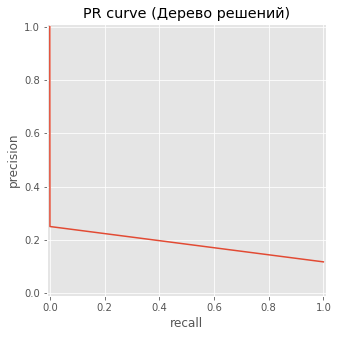

In [97]:
precisionDTC, recallDTC, thresholds = precision_recall_curve(y_test, predictDTC)
plt.figure(figsize=(5, 5))
plt.plot(recallDTC, precisionDTC)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve (Дерево решений)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

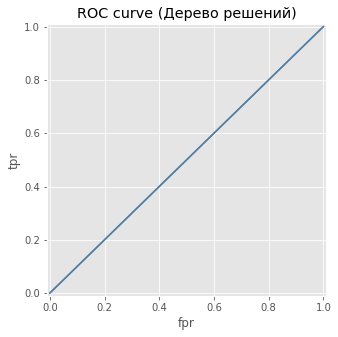

In [98]:
fprDTC, tprDTC, thresholds = roc_curve(y_test, predictDTC)

plt.figure(figsize=(5, 5))
plt.plot(fprDTC, tprDTC)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve (Дерево решений)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
# ---------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------

In [99]:
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)

In [124]:
# 2. Модель с алгоритммом "Случайный лес" - RandomForestClassifier
#------------------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [125]:
forest_params = {'max_depth': range(2, 7), 'max_features': range(2,10), \
                 'criterion': ['entropy', 'gini'], 'random_state': range(1,100)}

In [126]:
forest_grid = GridSearchCV(forest, forest_params, cv=5, n_jobs=-1, verbose=True)

In [127]:
forest_grid.fit(X_train, y_train)

Fitting 5 folds for each of 7920 candidates, totalling 39600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   27.2s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3184 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 4984 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 6034 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 7184 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 8434 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 9784 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 11234 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 12784 tasks      | elapsed:  7

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': range(2, 7), 'max_features': range(2, 10), 'criterion': ['entropy', 'gini'], 'random_state': range(1, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [128]:
forest_grid.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'max_features': 5, 'random_state': 71}

In [129]:
forest_grid.best_score_

0.881099565960805

In [130]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [131]:
predictForest = forest_grid.predict(X_test)

In [132]:
print('accurancy - ', accuracy_score(y_test, predictForest))
print('precision - ', precision_score(y_test, predictForest))
print('recall - ', recall_score(y_test, predictForest))
print('f1 - ', f1_score(y_test, predictForest))

accurancy -  0.9375
precision -  0.0
recall -  0.0
f1 -  0.0


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(-0.01, 1.01)

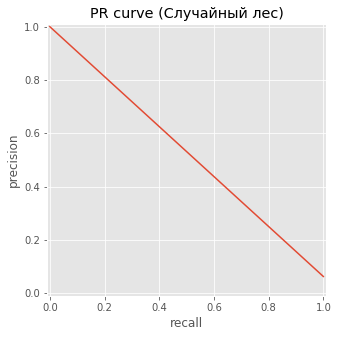

In [133]:
precisionRFC, recallRFC, thresholds = precision_recall_curve(y_test, predictForest)

plt.figure(figsize=(5, 5))
plt.plot(recallRFC, precisionRFC)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve (Случайный лес)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

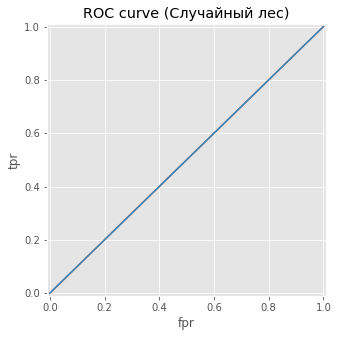

In [134]:
fprRFC, tprRFC, thresholds = roc_curve(y_test, predictForest)

plt.figure(figsize=(5, 5))
plt.plot(fprRFC, tprRFC)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve (Случайный лес)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
# ---------------------------------------------------------------------------------------------
# ---------------------------------------------------------------------------------------------

In [135]:
X = df_train_preproc.drop(['TARGET'], axis=1)
X_test = df_test_preproc.drop(['TARGET'], axis=1)
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.001, random_state=42)

In [150]:
# 3. Модель с алгоритммом "Логистическая регрессия" - LogisticRegression
#------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
#Init signature: 
#    LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
#                       class_weight=None, random_state=None, solver='liblinear', max_iter=100, multi_class='ovr', 
#                       verbose=0, warm_start=False, n_jobs=1)


In [161]:
LR_params = {'fit_intercept': [True], 'class_weight': [None, 'balanced'],\
             'solver' : ['newton-cg', 'lbfgs', 'sag', 'saga'],\
            'multi_class': ['ovr', 'multinomial']}

In [162]:
LR_grid = GridSearchCV(LR, LR_params, cv=5, n_jobs=-1, verbose=True)

In [163]:
LR_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   31.3s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'fit_intercept': [True], 'class_weight': [None, 'balanced'], 'solver': ['newton-cg', 'lbfgs', 'sag', 'saga'], 'multi_class': ['ovr', 'multinomial']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [164]:
LR_grid.best_params_

{'class_weight': None,
 'fit_intercept': True,
 'multi_class': 'ovr',
 'solver': 'lbfgs'}

In [165]:
LR_grid.best_score_

0.8809022754175984

In [166]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [168]:
predictLR = LR_grid.predict(X_test)

In [169]:
print('accurancy - ', accuracy_score(y_test, predictLR))
print('precision - ', precision_score(y_test, predictLR))
print('recall - ', recall_score(y_test, predictLR))
print('f1 - ', f1_score(y_test, predictLR))

accurancy -  0.9375
precision -  0.0
recall -  0.0
f1 -  0.0


C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(-0.01, 1.01)

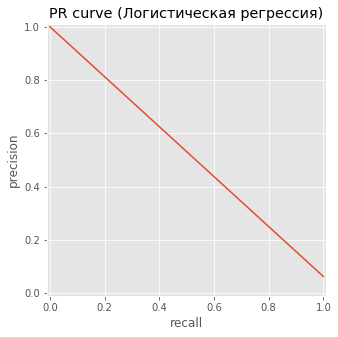

In [170]:
precisionLR, recallLR, thresholds = precision_recall_curve(y_test, predictLR)

plt.figure(figsize=(5, 5))
plt.plot(recallLR, precisionLR)
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid(True)
plt.title('PR curve (Логистическая регрессия)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

(-0.01, 1.01)

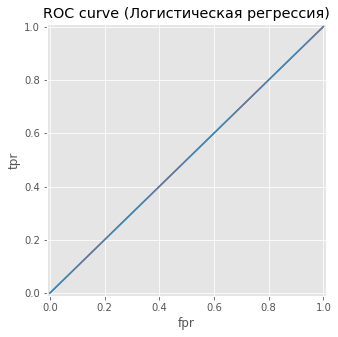

In [171]:
fprLR, tprLR, thresholds = roc_curve(y_test, predictLR)

plt.figure(figsize=(5, 5))
plt.plot(fprLR, tprLR)
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve (Логистическая регрессия)')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

In [ ]:
# Получились СОВСЕМ ПЛОХИЕ РЕЗУЛЬТАТЫ !
# Наверное, неправильно подготовил данные !?